# HISTOGRAMME ET INTERPRÉTATION

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore', category=UserWarning)

In [2]:
avis = pd.read_csv('./avis.csv')
avis.fillna('', inplace=True)
avis.head()

,author,date_published,title_review,note,review_href,title,url,treated,comment
0,Monsieur Guillaume,2021-01-27 11:06:44,Voyages sur les ailes des papillons,8,"""https://www.trictrac.net/avis/vraiment-bon-12...",Mariposas,https://www.trictrac.net/jeu-de-societe/maripo...,1,"Lorsque le jeu est jeu, bon, réflexif, joli po..."
1,morlockbob,2020-10-18 10:04:21,le festival de Michoacan,7,"""https://www.trictrac.net/avis/le-festival-de-...",Mariposas,https://www.trictrac.net/jeu-de-societe/maripo...,1,Comment continuer après un mega hit ? Simpleme...
2,SwatSh,2021-02-01 08:35:08,Vivez la migration des monarques,7,"""https://www.trictrac.net/avis/vivez-la-migrat...",Mariposas,https://www.trictrac.net/jeu-de-societe/maripo...,1,"Vin d'jeu: Avec Mariposas, Elizabeth Hargrave ..."
3,Timi JeuxATheme,2020-11-19 17:04:57,Bon,8,,Mariposas,https://www.trictrac.net/jeu-de-societe/maripo...,1,
4,prunelles,2021-05-24 12:43:18,Envolez-moi,9,"""https://www.trictrac.net/avis/envolez-moi""",Mariposas,https://www.trictrac.net/jeu-de-societe/maripo...,1,"Très joli bijou que ce jeu-là ! Le matériel, l..."


In [3]:
details = pd.read_csv("./details_processed.csv")
details.fillna('',inplace=True)
details.head()

,categories,casting,gameplay,description,full_title,url,Note,Nombre d'avis,Note Finkel
0,,Par Eric Lang et Andrea ChiarvesioIllustré par...,1 à 4|14 ans et +|45,\n Marvel United : Unis c...,Marvel United (2020),https://www.trictrac.net/jeu-de-societe/marvel...,7.58,19.0,8.74
1,,Par Elizabeth HargraveIllustré par Matt Paquet...,2 à 5|14 ans et +|60,"\n Chaque année, au print...",Mariposas (2020),https://www.trictrac.net/jeu-de-societe/mariposas,7.39,33.0,7.68
2,Enchères|Aventures dans la jungle|Collection /...,Par Alexandre GarciaIllustré par Nastya LehnÉd...,2 à 5|8 ans et +|45,\n Vous êtes à la tête d’...,Quetzal (2020),https://www.trictrac.net/jeu-de-societe/quetzal,8.18,28.0,7.42
3,,Édité par Arkhane Asylum Publishing,à partir de 1|12 ans et +|~,\n Un Kit de démarrage co...,Alien - Kit de Démarrage (2020),https://www.trictrac.net/jeu-de-societe/alien-...,9.00,4.0,0.00
4,Card-driven|Combinaison|Coopération|Deck build...,Par Maxime Rambourg et Théo RivièreIllustré pa...,1 à 4|12 ans et +|60,\n Le Dr Foo a créé une t...,The LOOP (2020),https://www.trictrac.net/jeu-de-societe/the-loop,8.75,72.0,9.70


In [4]:
#titre de jeux avec une note de 0 
print(details.loc[details["Note"] == 0.0, ["full_title", "Nombre d'avis"]])

#titre de jeux avec une note de 0 et un nombre d'avis egale a 0
print(details.loc[(details["Note"] == 0.0) & (details["Nombre d'avis"] == 0.0), ["full_title", "Nombre d'avis"]])

#titre de jeux avec une note de 0 et un nombre d'avis superieur a 0
print(details.loc[(details["Note"] == 0.0) & (details["Nombre d'avis"] > 0.0), ["full_title", "Nombre d'avis"]])

                                              full_title  Nombre d'avis
21                                       Nineteen (2020)            0.0
36                                     Evokimages (2019)            0.0
50     Horreur à Arkham : Le Jeu de Cartes - Le Dévor...            0.0
79                           Yeah/Nope (yeahNope) (2019)            0.0
106                                    Ars Bellum (2020)            0.0
...                                                  ...            ...
16867                   Quelques Arpents de Neige (2006)            0.0
16868                     La Gourmandise des Grenouilles            0.0
16869                                Golden Horde (2006)            0.0
16870                          Toppling The Reich (2006)            0.0
16871                             Imperial Sunset (2006)            0.0

[5919 rows x 2 columns]
                                              full_title  Nombre d'avis
21                                     

In [5]:
category_counts = np.zeros(30)

for category in details["categories"]:
    sections = category.split('|')
    section_count = len(sections)
    if category == '':  # Vérifiez si le nombre de sections est égal à zéro
        category_counts[0] += 1
    else:
        category_counts[section_count] += 1

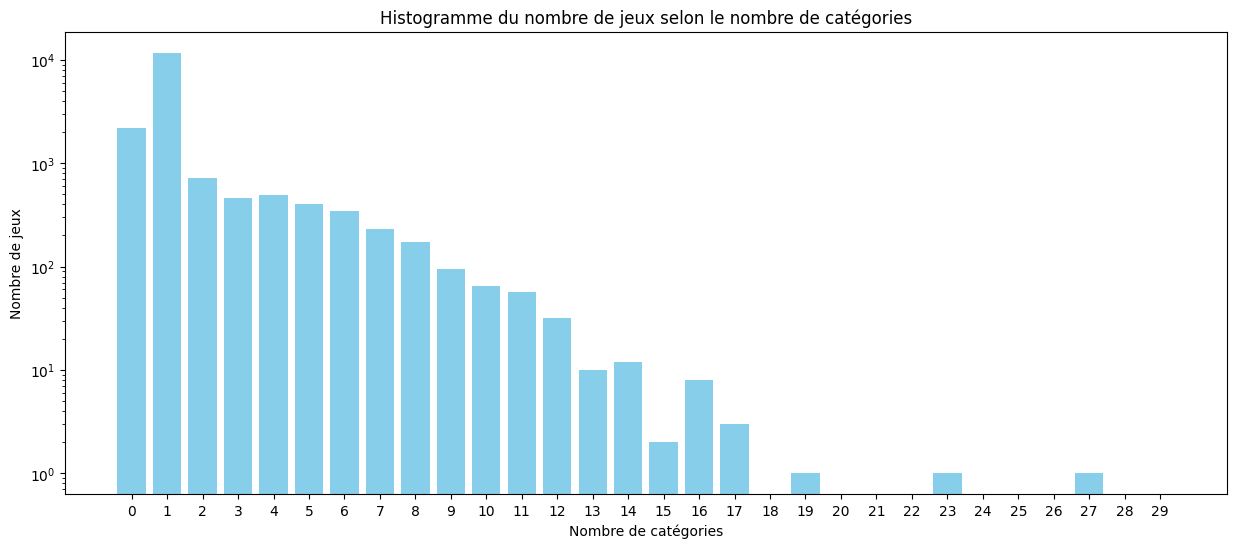

In [6]:
# Création des valeurs pour l'axe des abscisses (ajustées pour inclure le zéro)
x_values = np.arange(len(category_counts) + 1)
# Création de l'histogramme
plt.figure(figsize=(15, 6))
plt.bar(x_values[:-1], category_counts, color='skyblue')  # Utilisez x_values[:-1] pour exclure le dernier élément
plt.yscale('log')
# Ajout des étiquettes et du titre
plt.xlabel('Nombre de catégories')
plt.ylabel('Nombre de jeux')
plt.title('Histogramme du nombre de jeux selon le nombre de catégories')
plt.xticks(np.arange(30))
# Affichage 
plt.show()

Il y a 2198 jeux qui n'ont pas de catégorie du tout, ce qui pourrait indiquer une absence de classification pour ces jeux.\
La majorité des jeux (11581) sont associés à une seule catégorie, ce qui peut être considéré comme une classification simple et claire.\
Ensuite, on observe une diminution du nombre de jeux à mesure que le nombre de catégories augmente, bien que certains jeux soient associés à un nombre relativement élevé de catégories (27 au maximum dans ce cas).

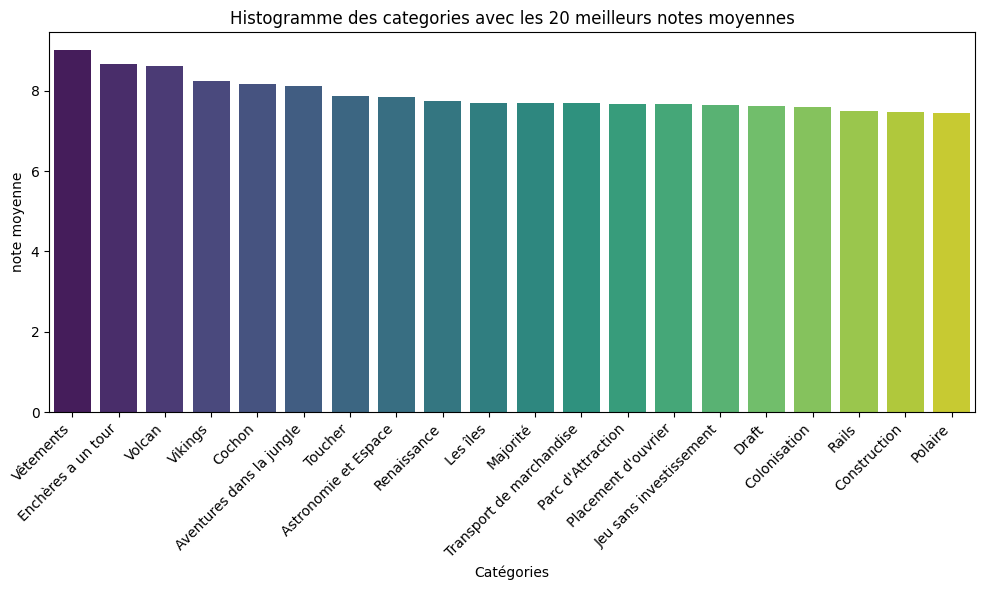

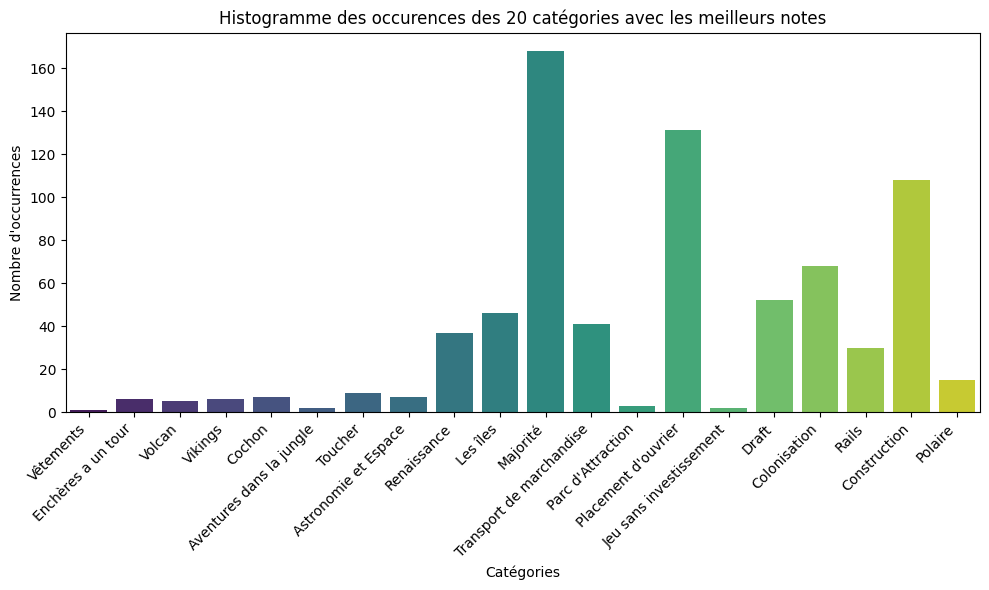

In [7]:
occ_categories = pd.read_csv('../Data/occurrences_par_categorie.csv')

#histogramme des 20 meilleurs notes par categories
top_20_mieux_notée = occ_categories.sort_values(by='mean_note', ascending=False).head(20)

# Créer un histogramme avec sns.barplot
plt.figure(figsize=(10, 6))
sns.barplot(data=top_20_mieux_notée, x='categories', y='mean_note', hue='categories', palette='viridis', legend=False)
plt.xticks(rotation=45, ha='right')  # Rotation des étiquettes sur l'axe des x pour une meilleure lisibilité
plt.xlabel('Catégories')
plt.ylabel("note moyenne")
plt.title('Histogramme des categories avec les 20 meilleurs notes moyennes')
plt.tight_layout()
plt.show()



# Créer un histogramme avec sns.barplot
plt.figure(figsize=(10, 6))
sns.barplot(data=top_20_mieux_notée, x='categories', y='count', hue='categories', palette='viridis', legend=False)
plt.xticks(rotation=45, ha='right')  # Rotation des étiquettes sur l'axe des x pour une meilleure lisibilité
plt.xlabel('Catégories')
plt.ylabel("Nombre d'occurrences")
plt.title('Histogramme des occurences des 20 catégories avec les meilleurs notes')
plt.tight_layout()
plt.show()


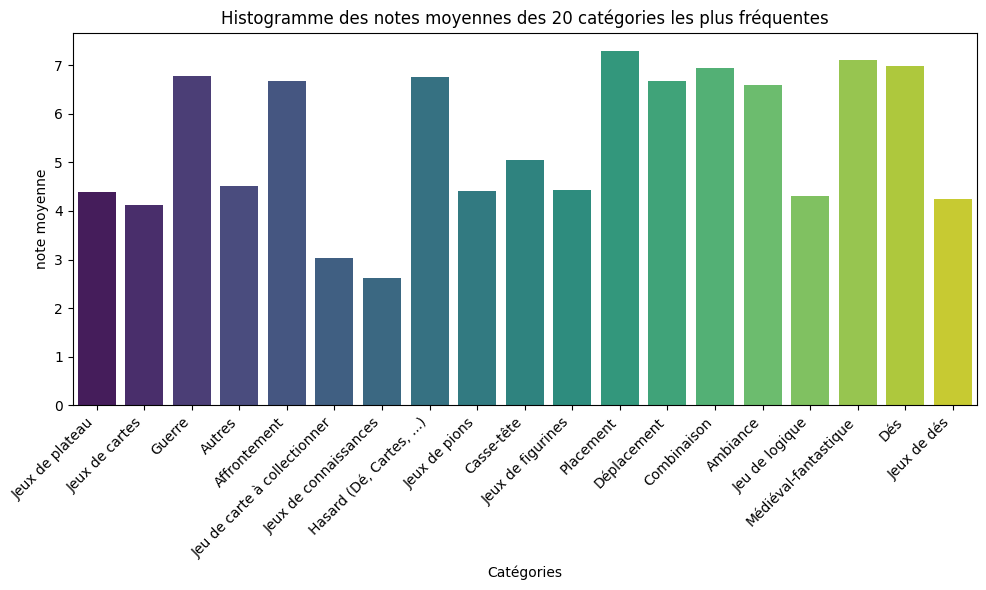

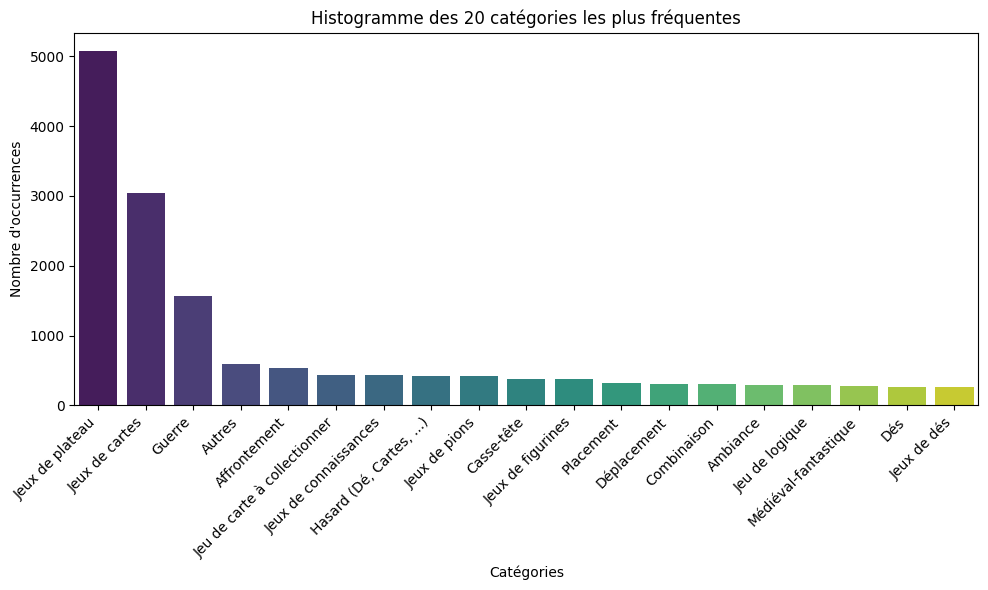

In [8]:
#histogramme des notes des 20 categories les plus joué
top_20_categories = occ_categories.sort_values(by='count', ascending=False).head(20)

# Créer un histogramme avec sns.barplot
plt.figure(figsize=(10, 6))
sns.barplot(data=top_20_categories, x='categories', y='mean_note', hue='categories', palette='viridis', legend=False)
plt.xticks(rotation=45, ha='right')  # Rotation des étiquettes sur l'axe des x pour une meilleure lisibilité
plt.xlabel('Catégories')
plt.ylabel("note moyenne")
plt.title('Histogramme des notes moyennes des 20 catégories les plus fréquentes')
plt.tight_layout()
plt.show()

# Créer un histogramme avec sns.barplot
plt.figure(figsize=(10, 6))
sns.barplot(data=top_20_categories, x='categories', y='count', hue='categories', palette='viridis', legend=False)
plt.xticks(rotation=45, ha='right')  # Rotation des étiquettes sur l'axe des x pour une meilleure lisibilité
plt.xlabel('Catégories')
plt.ylabel("Nombre d'occurrences")
plt.title('Histogramme des 20 catégories les plus fréquentes')
plt.tight_layout()
plt.show()

# Travaille sur les NLP graphe de visualisation pour le rapport

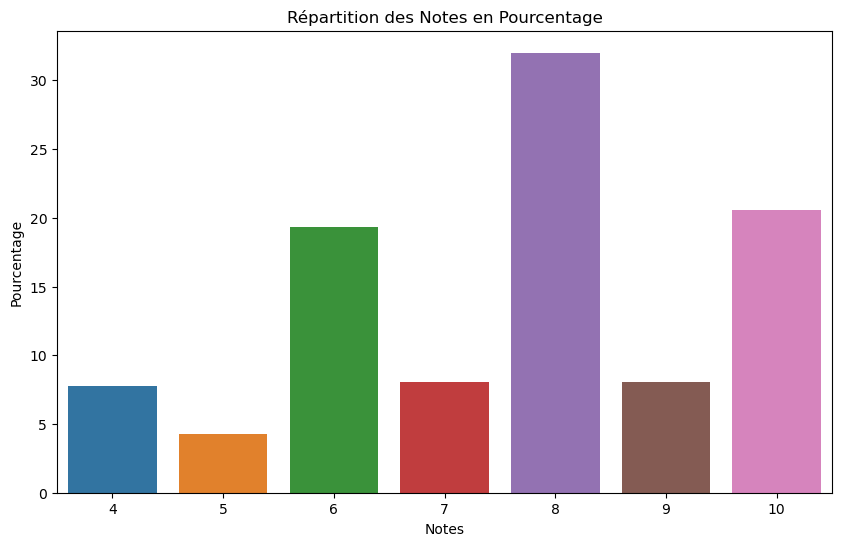

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Données fournies
data = {
    'Notes': [4, 5, 6, 7, 8, 9, 10],
    'Pourcentage': [7.78, 4.24, 19.30, 8.03, 32.01, 8.09, 20.56]
}

# Création du DataFrame
df = pd.DataFrame(data)

# Création du graphique
plt.figure(figsize=(10, 6))
sns.barplot(x='Notes', y='Pourcentage', data=df)

# Ajouter des labels et un titre
plt.xlabel('Notes')
plt.ylabel('Pourcentage')
plt.title('Répartition des Notes en Pourcentage')

# Afficher le graphique
plt.show()

C:\Users\lazra\anaconda3\envs\new_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\lazra\anaconda3\envs\new_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\lazra\anaconda3\envs\new_env\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\lazra\anaconda3\envs\new_env\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with 

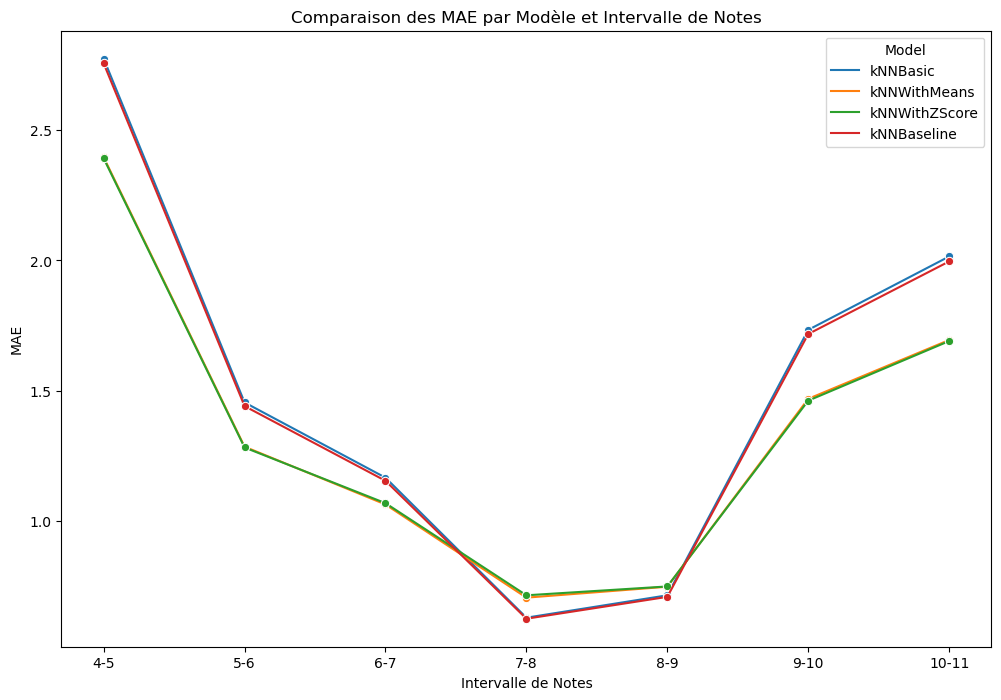

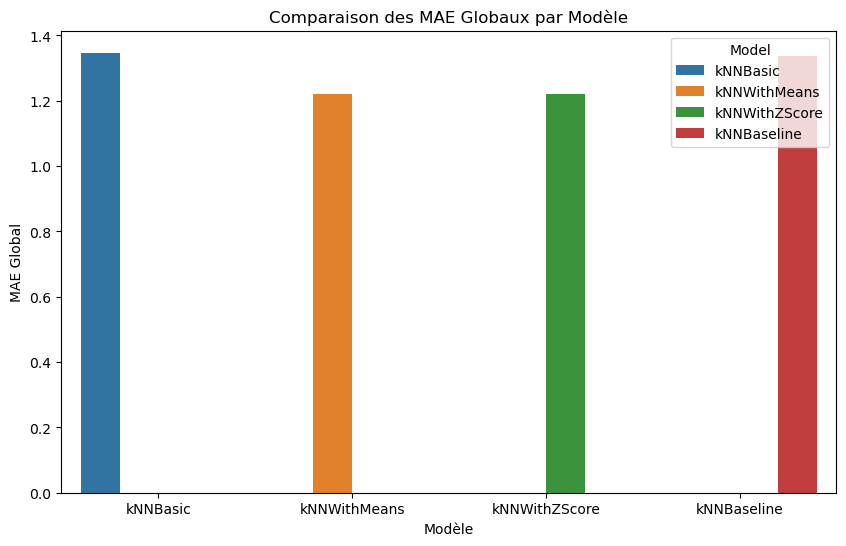

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Données fournies
data = {
    'Note Interval': ['4-5', '5-6', '6-7', '7-8', '8-9', '9-10', '10-11'],
    'kNNBasic': [2.775, 1.454, 1.165, 0.627, 0.713, 1.733, 2.015],
    'kNNWithMeans': [2.396, 1.284, 1.062, 0.704, 0.746, 1.468, 1.694],
    'kNNWithZScore': [2.392, 1.281, 1.067, 0.713, 0.747, 1.461, 1.690],
    'kNNBaseline': [2.757, 1.440, 1.153, 0.623, 0.707, 1.717, 1.996]
}

global_mae = {
    'Model': ['kNNBasic', 'kNNWithMeans', 'kNNWithZScore', 'kNNBaseline'],
    'MAE Global': [1.347, 1.222, 1.222, 1.336]
}

# Création des DataFrames
df = pd.DataFrame(data)
df_global = pd.DataFrame(global_mae)

# Transformation du DataFrame pour Seaborn
df_melt = df.melt(id_vars='Note Interval', var_name='Model', value_name='MAE')

# Création du graphique en ligne pour les intervalles de notes
plt.figure(figsize=(12, 8))
sns.lineplot(x='Note Interval', y='MAE', hue='Model', data=df_melt, marker='o')

# Ajouter des labels et un titre
plt.xlabel('Intervalle de Notes')
plt.ylabel('MAE')
plt.title('Comparaison des MAE par Modèle et Intervalle de Notes')

# Afficher le graphique
plt.show()

# Création du graphique en barre pour les MAE globaux
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='MAE Global', data=df_global, hue='Model')

# Ajouter des labels et un titre
plt.xlabel('Modèle')
plt.ylabel('MAE Global')
plt.title('Comparaison des MAE Globaux par Modèle')

# Afficher le graphique
plt.show()